In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, SparsePCA

In [2]:
import warnings
warnings.filterwarnings("always")

# Problem 5

### Problem 4(a)

In [3]:
mnist = pd.read_csv("mnist_train.csv")
mnist.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Extract the features (pixels) and labels from the dataset
X = mnist.iloc[:, 1:] 
y = mnist.iloc[:, 0] 
print(f"The size of the dataset is {X.shape}")

The size of the dataset is (60000, 784)


In [5]:
# Center and scale the data
scaler = StandardScaler().fit(X)

In [6]:
# Performing PCA
num_components = 50
pca = PCA(num_components).fit(scaler.transform(X))
pca.components_

array([[ 1.55923693e-17, -2.32373982e-19, -1.32258554e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.69705694e-18, -4.78079483e-17,  6.04933052e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.28593034e-17,  3.56798439e-17, -1.34736328e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-2.54766335e-17, -1.72220525e-17,  6.54996683e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.50123013e-18, -1.30081606e-17,  1.01761750e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.74318317e-17,  3.52515073e-17, -2.04966653e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [7]:
# Perform PCA
reduced = pca.transform(X)
print(f"The size of dataset after performing PCA: {reduced.shape}")
print(f"The explained variance ratio for each component is given below")
print(pca.explained_variance_ratio_)

/Users/raymondtsao/anaconda3/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


The size of dataset after performing PCA: (60000, 50)
The explained variance ratio for each component is given below
[0.05646717 0.04078272 0.0373938  0.02885115 0.02521109 0.0219427
 0.01923344 0.01745799 0.01535092 0.0140172  0.01341743 0.01203742
 0.0111457  0.01089923 0.01028649 0.00994486 0.00936382 0.00921046
 0.00893436 0.00869911 0.00827363 0.00803416 0.00764839 0.00741743
 0.00715259 0.00691824 0.00684116 0.00656629 0.00631611 0.00612802
 0.00596144 0.00587538 0.00571382 0.00561803 0.00554462 0.0053817
 0.00530727 0.00518863 0.00506896 0.00479059 0.00475101 0.00466303
 0.00451828 0.00449272 0.00445313 0.00436841 0.00426383 0.00425607
 0.00421567 0.00418713]


In [8]:
reduced.shape

(60000, 50)

### Problem 4(b)

In [9]:
# Calculate explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

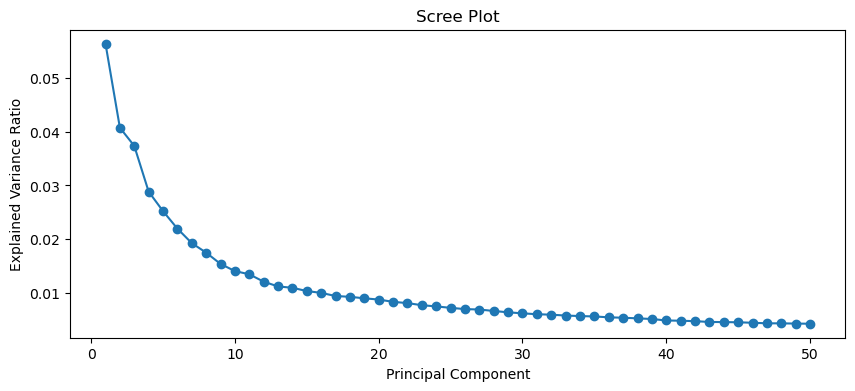

In [10]:
# Creating a scree plot
plt.figure(figsize=(10, 4))
plt.plot(range(1, num_components + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [11]:
# Calculate cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

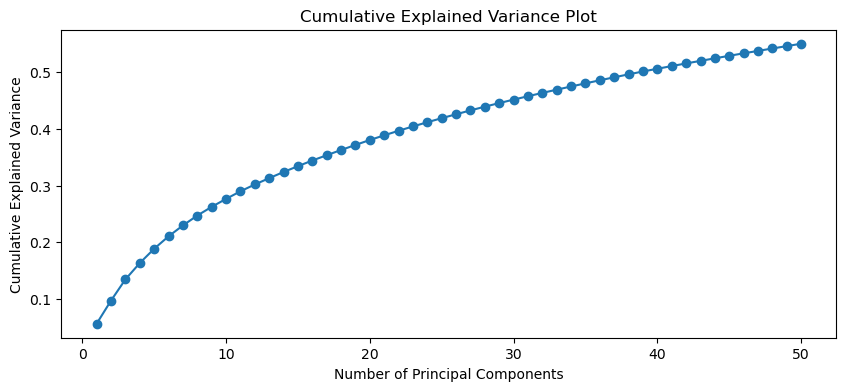

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, num_components + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

### Problem 4(c)

In [13]:
# Perform PCA with number of components = 2
num_components = 2
pca2 = PCA(num_components).fit(scaler.transform(X))
reduced2 = pca2.transform(X)
print(f"The size of dataset after performing PCA: {reduced2.shape}")

/Users/raymondtsao/anaconda3/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


The size of dataset after performing PCA: (60000, 2)


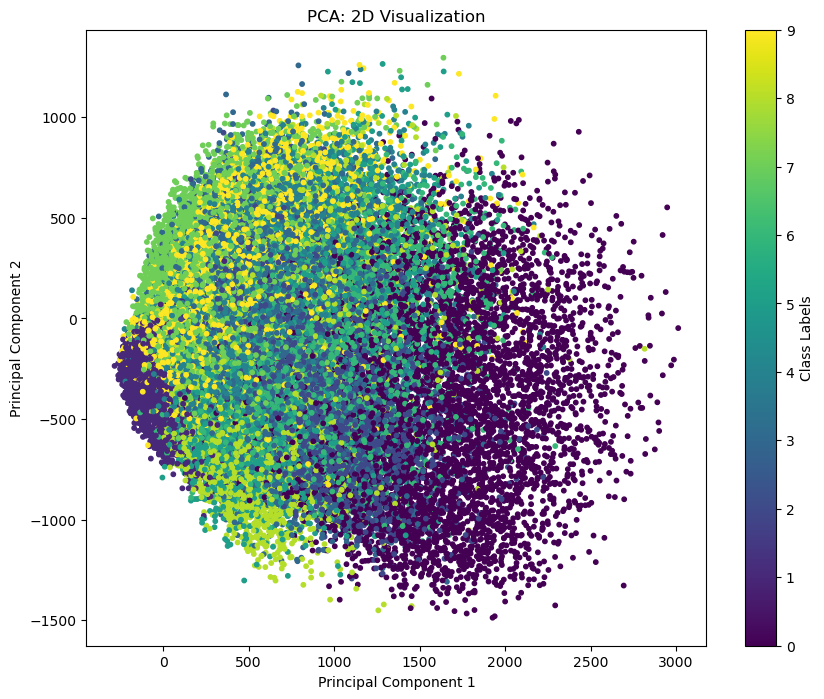

In [14]:
# Create a scatter plot color-coded with class labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(scatter, label='Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Visualization')
plt.show()

From the result of PCA, we see that the project provides decent information about the clusters. For example, we see that class 0 forms its own cluster. However, for some other numbers such as 9, the cluster seems to be more spread out and hard to tell.

### Problem 4(d)

In [15]:
# Perform PCA with number of components = 5
num_components = 5
pca5 = PCA(num_components).fit(scaler.transform(X))
reduced5 = pca5.transform(X)
print(f"The size of dataset after performing PCA: {reduced5.shape}")

/Users/raymondtsao/anaconda3/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


The size of dataset after performing PCA: (60000, 5)


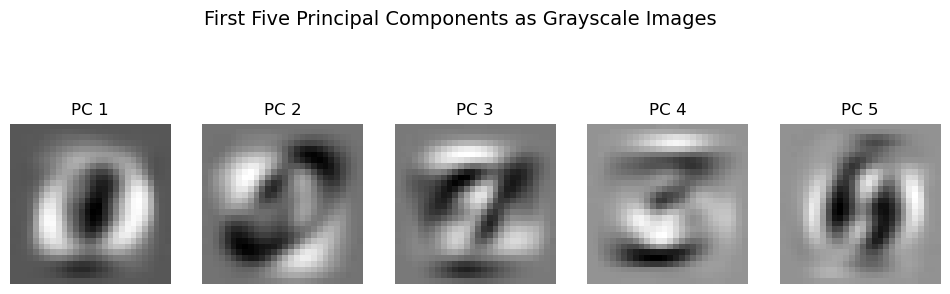

In [16]:
# Plot the first five principal components as grayscale images
plt.figure(figsize=(12, 4))
for i in range(num_components):
    plt.subplot(1, num_components, i + 1)
    pc_image = pca.components_[i].reshape(28, 28)
    plt.imshow(pc_image, cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')

plt.suptitle('First Five Principal Components as Grayscale Images', fontsize=14)
plt.show()

From the result, we see the pattern capture becomes harder to capture as the number of principal component increased. For example, PC1 captures the variance between numbers with circular pattern as well as straight line pattern, while PC2 captures a variance of numbers with distorted/rotated circular pattern.

### Problem 4(e)

To reduce the runtime, we randomly select 6000 (10%) data points

In [17]:
# Randomly sample 6000 data points
mnist_reduced = mnist.sample(n=6000, random_state=42)
X_reduced = mnist_reduced.iloc[:, 1:] 
y_reduced = mnist_reduced.iloc[:, 0] 
print(f"The size of the dataset is {X_reduced.shape}")

The size of the dataset is (6000, 784)


The following histogram confirms that the sampling is uniform across all classes.

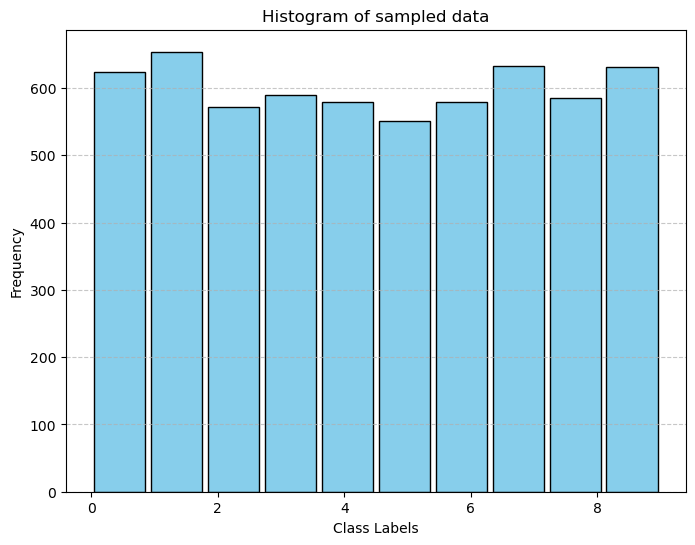

In [18]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(y_reduced, bins=10, rwidth=0.9, color='skyblue', edgecolor='black')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Histogram of sampled data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
# Center and scale the data
scaler_reduced = StandardScaler().fit(X_reduced)

In [20]:
# Performing PCA
num_components = 700
pca = PCA(num_components).fit(scaler_reduced.transform(X_reduced))

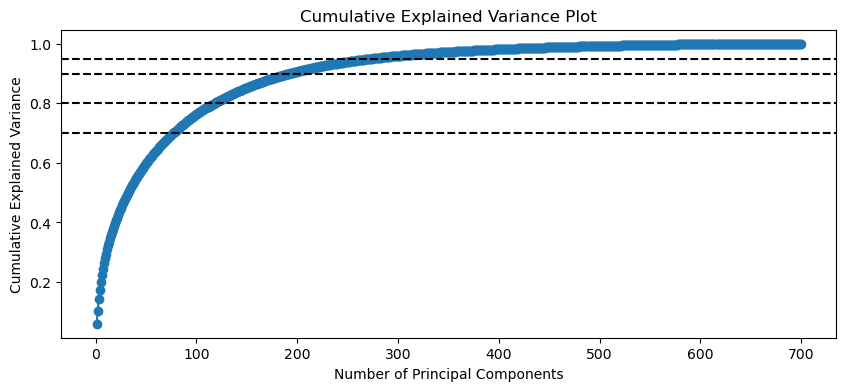

In [21]:
# Plotting the scree plot, with variance explained plotted
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(10, 4))
plt.plot(range(1, num_components + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')

for percentage in [0.7, 0.8, 0.9, 0.95]:
    plt.axhline(y=percentage, color='black', linestyle='--', label=f'{percentage * 100}%')
plt.show()

From the graph, we see that the number of principal components required to achieve 70%, 80%, 90%, 95% explained variance is around 80, 120, 200, and 270. Below we compute the actual value:

In [22]:
components_needed = []

# Iterate through the cumulative variance to find the number of components needed
for percentage in [0.7, 0.8, 0.9, 0.95]:
    components_needed.append(next(i for i, val in enumerate(cumulative_variance) if val >= percentage) + 1)

for percentage, components in zip([0.7, 0.8, 0.9, 0.95], components_needed):
    print(f"{percentage * 100}% explained variance: {components} components")

70.0% explained variance: 78 components
80.0% explained variance: 118 components
90.0% explained variance: 193 components
95.0% explained variance: 274 components


### Problem 4(f)

In [23]:
scaler_reduced = StandardScaler().fit(X_reduced)
kernel_pca = KernelPCA(kernel="sigmoid", gamma=0.01, n_components=2).fit(scaler_reduced.transform(X_reduced))
kernel_reduced = kernel_pca.transform(X_reduced)

/Users/raymondtsao/anaconda3/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KernelPCA was fitted without feature names
  warnings.warn(


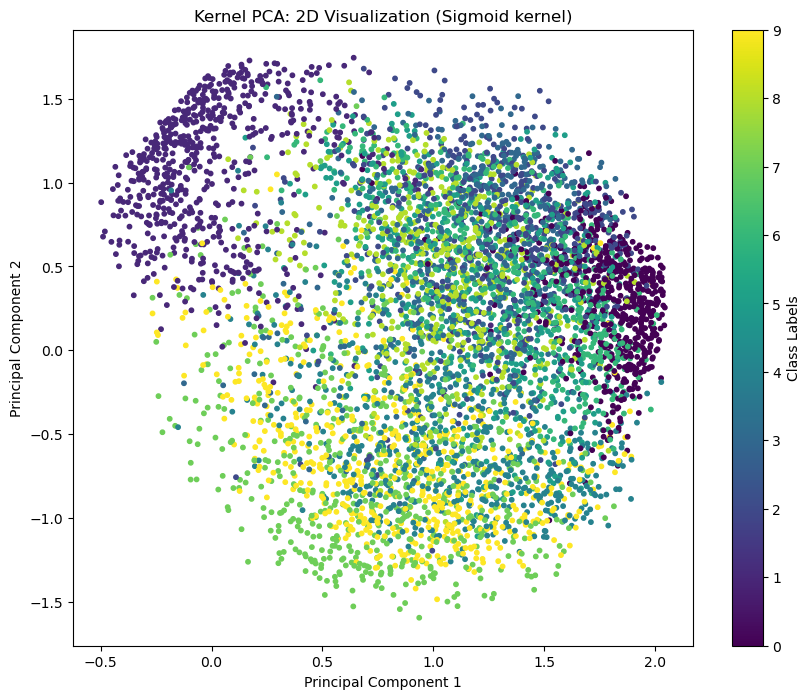

In [24]:
# Create a scatter plot color-coded with class labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(kernel_reduced[:, 0], kernel_reduced[:, 1], c=y_reduced, cmap='viridis', s=10)
plt.colorbar(scatter, label='Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Kernel PCA: 2D Visualization (Sigmoid kernel)')
plt.show()

In [25]:
scaler_reduced = StandardScaler().fit(X_reduced)
sparse_pca = SparsePCA(n_components=2, alpha=0.1).fit(scaler_reduced.transform(X_reduced))
sparse_reduced = sparse_pca.transform(X_reduced)

/Users/raymondtsao/anaconda3/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SparsePCA was fitted without feature names
  warnings.warn(


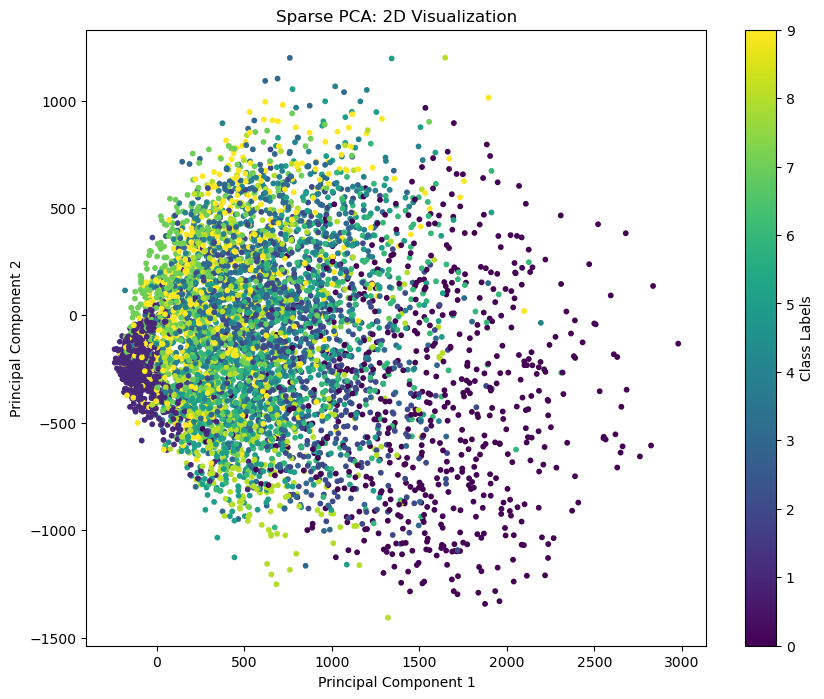

In [26]:
# Create a scatter plot color-coded with class labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(sparse_reduced[:, 0], sparse_reduced[:, 1], c=y_reduced, cmap='viridis', s=10)
plt.colorbar(scatter, label='Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Sparse PCA: 2D Visualization')
plt.show()

# Problem 5

In [3]:
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

### Problem 5(a)

In [4]:
# Read in the libras movement data
path = "libras/movement_libras.data"
data = pd.read_csv(path, header=None)

In [5]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,0.79691,0.38194,0.79691,0.37731,0.79884,0.37731,0.79497,0.37731,0.77563,0.35417,...,0.51389,0.39845,0.42593,0.47389,0.36111,0.55899,0.31250,0.63830,0.29398,1
1,0.67892,0.27315,0.68085,0.27315,0.68085,0.27315,0.68085,0.27315,0.67892,0.26852,...,0.57407,0.17795,0.63657,0.17215,0.67361,0.17021,0.69213,0.17215,0.69213,1
2,0.72147,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,...,0.30556,0.59768,0.25926,0.67118,0.25231,0.73501,0.26620,0.78143,0.27778,1
3,0.56480,0.32407,0.56286,0.32407,0.56093,0.32407,0.55899,0.32407,0.55899,0.32407,...,0.49074,0.26306,0.42361,0.33269,0.34722,0.41006,0.28009,0.49130,0.24306,1
4,0.67118,0.38426,0.67118,0.38657,0.67311,0.38657,0.67311,0.38426,0.67311,0.37963,...,0.76389,0.44101,0.64120,0.45068,0.54167,0.47776,0.44213,0.53191,0.34259,1


In [6]:
# Isolate the variables and response
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [7]:
# Perform k-means clustering for k= 15
centroids, _ = kmeans(X, 15)
cluster, _ = vq(X, centroids)
silhouette_avg = silhouette_score(X, cluster)
print(f"The silhoutte average for k-means clustering for k=15 is {silhouette_avg}")

The silhoutte average for k-means clustering for k=15 is 0.2529631812302217


In [56]:
# Perform k-means clustering for k= 2 to 21
silhouette_scores = []
k_values = range(2, 21)  

for k in k_values:
    centroids, _ = kmeans(X, k)
    cluster, _ = vq(X, centroids)
    silhouette_avg = silhouette_score(X, cluster)
    silhouette_scores.append(silhouette_avg)

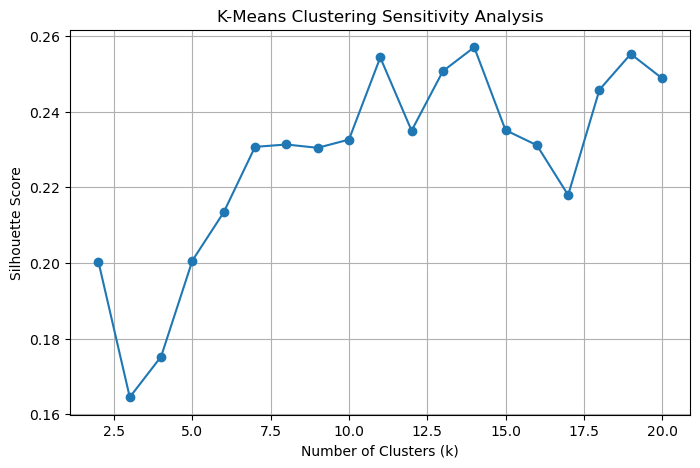

In [57]:
# Plot the silhouette scores for different k values
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('K-Means Clustering Sensitivity Analysis')
plt.grid(True)
plt.show()

### Problem 5(b)

In [58]:
# Perform K-Means clustering for a range of k values
wcss = []
k_values = range(2, 21) 
for k in k_values:
    centroids, _ = kmeans(X, k)
    cluster, _ = vq(X, centroids)
    distances = np.min(cdist(X, centroids), axis=1)
    wcss.append(np.sum(distances ** 2))

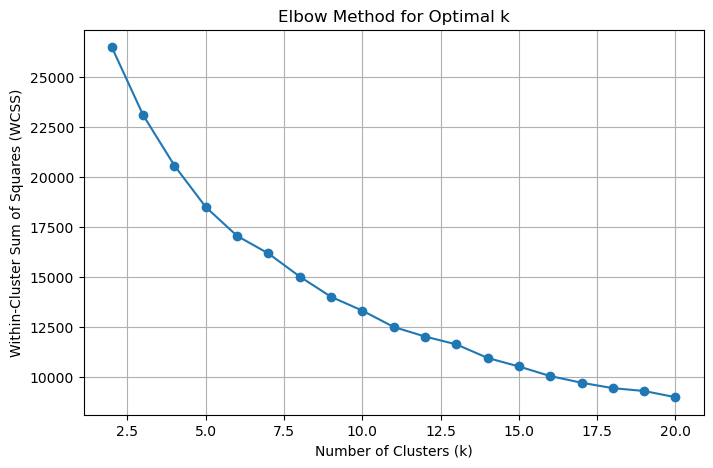

In [59]:
# Plot the WCSS for different k values
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.show()

From the graph, we see that the optimal k is around 15 to 17

### Problem 5(c)

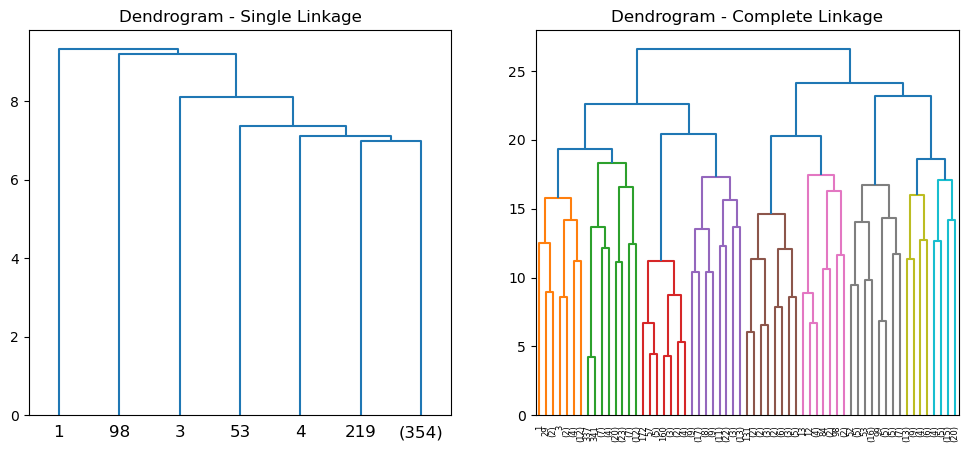

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

single_linkage = linkage(X, method='single')
complete_linkage = linkage(X, method='complete')

# Plot dendrogram for single linkage
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Dendrogram - Single Linkage')
dendrogram(single_linkage, p=5, truncate_mode='level')

# Plot dendrogram for complete linkage
plt.subplot(122)
plt.title('Dendrogram - Complete Linkage')
dendrogram(complete_linkage, p=5, truncate_mode='level')

plt.show()

### Problem 5(d)

In [61]:
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X)

In [63]:
# Perform k-means clustering for k= 15
centroids, _ = kmeans(X_pca, 15)
cluster, _ = vq(X_pca, centroids)
silhouette_avg = silhouette_score(X_pca, cluster)
print(f"The silhoutte average for k-means clustering for k=15 is {silhouette_avg}")

The silhoutte average for k-means clustering for k=15 is 0.2902229991588104


In [64]:
# Perform k-means clustering for k= 2 to 21
silhouette_scores = []
k_values = range(2, 21)  

for k in k_values:
    centroids, _ = kmeans(X_pca, k)
    cluster, _ = vq(X_pca, centroids)
    silhouette_avg = silhouette_score(X_pca, cluster)
    silhouette_scores.append(silhouette_avg)

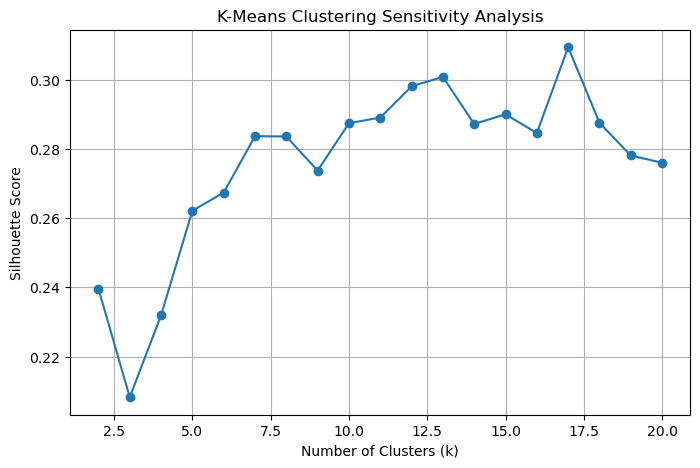

In [65]:
# Plot the silhouette scores for different k values
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('K-Means Clustering Sensitivity Analysis')
plt.grid(True)
plt.show()